<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/220321_ch4_%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##4.1 선형 회귀

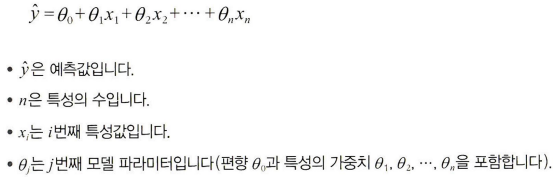



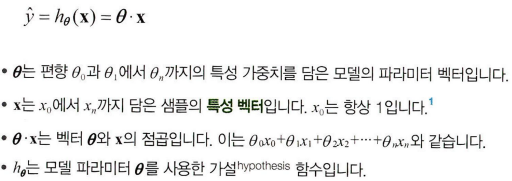

모델 훈련: 모델이 훈련 세트에 가장 잘 맞게 모델 파라미터(회귀: RMSE or MSE)를 설정하는 것

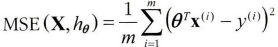

###4.1.1 정규방정식

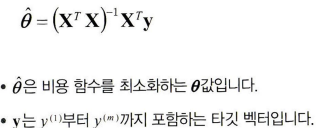

**유사역행렬 np.linalg.pinv(X, y)**
- 특이값 분해singular value decomposition(SVD)라는 표준 행렬 분해 기법을 이용해 계산
- 정규방정식을 계산하는 것보다 효율적

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

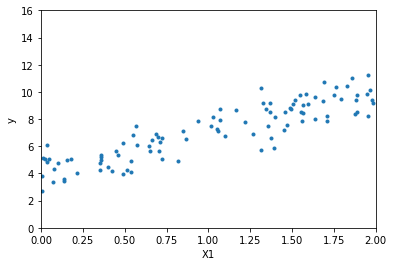

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, '.')
plt.xlabel('X1')
plt.ylabel('y')
plt.xlim(0.00, 2.00)
plt.ylim(0, 16)
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]   #모든 샘플에 x0 = 1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.29957498],
       [2.87198482]])

In [5]:
X_new = np.array(([0], [2]))
X_new_b = np.c_[np.ones((2, 1)), X_new]     #모든 샘플에 x0 = 1 추가
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 4.29957498],
       [10.04354462]])

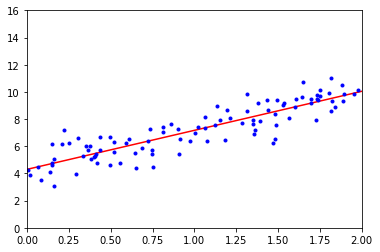

In [8]:
plt.plot(X_new, y_pred, 'r-')
plt.plot(X, y, 'b.')
plt.xlim(0.00, 2.00)
plt.ylim(0, 16)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X, y)

LinearRegression()

In [10]:
lg.intercept_, lg.coef_

(array([4.29957498]), array([[2.87198482]]))

In [11]:
lg.predict(X_new)

array([[ 4.29957498],
       [10.04354462]])

In [12]:
#유사 역행렬
np.linalg.pinv(X_b).dot(y)

array([[4.29957498],
       [2.87198482]])

###4.1.2 계산 복잡도

**정규 방정식의 계산 복잡도: O(n^2.4) ~ O(n^3)**

**SVD의 계산 복잡도: O(n^2)**

## 4.2 경사 하강법gradient descent(GD)
: 비용 함수를 최소화하기 위해 반복적으로 파라미터를 조정

**학습률learning rate**
- 너무 작으면 반복횟수가 늘어나 시간이 오래 걸림
- 너무 크면 알고리즘이 더 큰 값으로 발산할 수도 있음

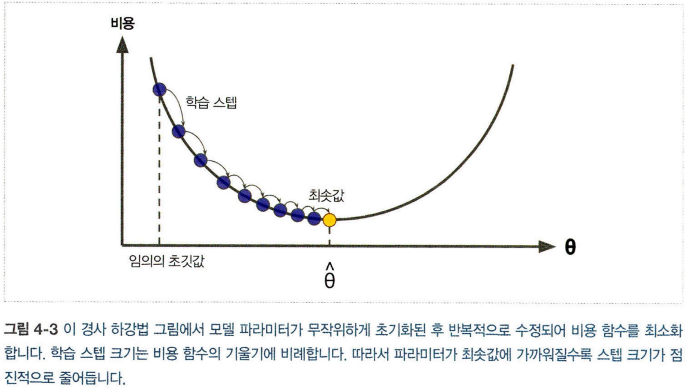

**경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 함**

모델이 가진 파라미터가 많을수록 파라미터 공간이 커짐
= 최솟값을 찾기 어려워짐

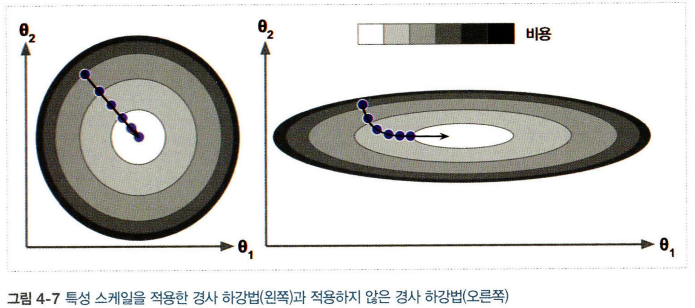

###4.2.1 배치 경사 하강법

: 매 스텝마다 전체 훈련 세트 X에 대해 계산. 데이터가 클수록 느려지나 **특성 수에 민감하지 않음**.

편도 함수patial derivative: 경사 하강법을 구현하기 위해서는 각 모델 파라미터에 대해 비용 함수의 gradient를 계산

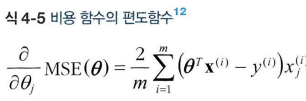

편도 함수를 한 번에 계산하는 방법

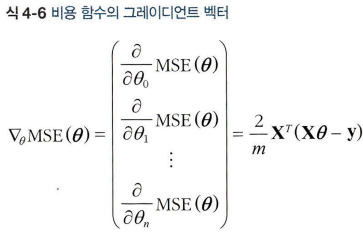

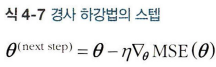

In [13]:
eta = 0.1 #학습률
n_iter = 1000   #반복횟수
m = 100

theta = np.random.randn(2, 1)

for iter in range(n_iter):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.29957498],
       [2.87198482]])

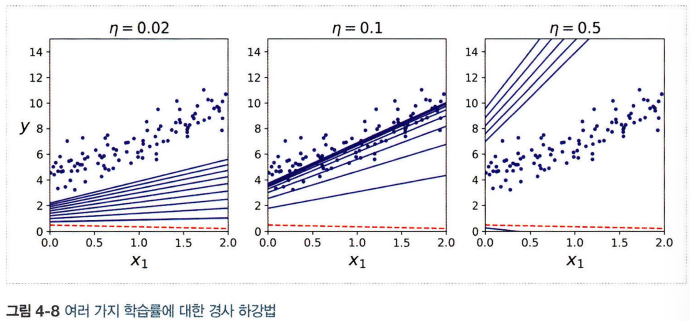


적절한 학습률을 찾기 위해선 그리드 탐색을 시도, 그러나 수행 시간을 고려해 반복 횟수를 제한해야 함

### 4.2.2 확률적 경사 하강법

- 배치 경사 하강법과 달리 매 스템에서 한 개의 샘플을 무작위로 선택해 그에 대한 gradient를 계산해 훨씬 빠르게 수행
- 확률적이기 때문에 알고리즘이 불안정
- 비용 함수가 불규칙할 경우 지역 최솟값을 건너뛰고 전역 최솟값을 찾을 수도 있음
- 해결방법: 학습률을 점차 줄여나가는 방식.
    - 학습 스케쥴learning schedule: 매 반복에서 학습률을 결정하는 함수

In [15]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.rand(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.28085572],
       [2.88879773]])

In [29]:
from sklearn.linear_model import SGDRegressor

sgd_rg = SGDRegressor(max_iter=1000, tol = 1e-3, penalty=None, eta0=0.1)
sgd_rg.fit(X, y.ravel())

sgd_rg.intercept_, sgd_rg.coef_

(array([3.65798547]), array([0.79309331]))

###4.2.3 미니배치 경사 하강법mini-batch gradient descent

임의의 작은 샘플 세트(미니배치)에 대해 gradient 계산

확률적 경사 하강법에 비해 행렬 연산에 최적화된 하드웨어와 GPU를 사용해 성능 향상

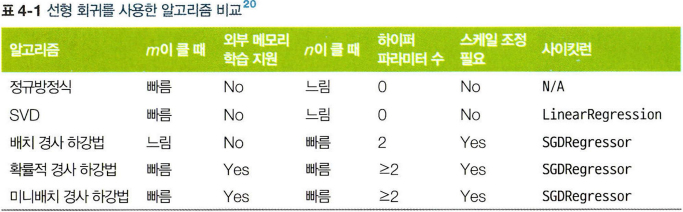

##4.3 다항 회귀polynomial regression

비선형 데이터를 학습하기 위해서, 각 특성의 거듭제곱을 새 특성으로 추가해 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 방법

image.png

특성이 여러 개일 때 다항 회귀는 특성 사이의 관계를 찾을 수 있음. 

: PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문. 

-> PolynomialFeatures(degree=d)는 특성이 n개인 배열을 특성이 (n+d)!/d!n!개인 배열로 변환하므로 주의해야 함.

    ex. a, b가 있을 때 degree=3으로 적용하면 a^2, a^3, b^2, b^3뿐만 아니라 ab, a^2b, ab^2도 특성으로 추가함

In [4]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

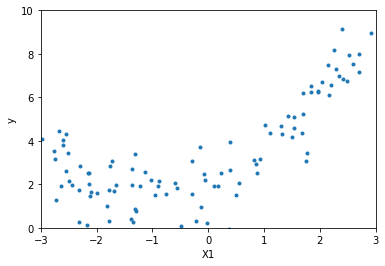

In [5]:
plt.plot(X, y, '.')
plt.xlabel('X1')
plt.ylabel('y')
plt.xlim(-3, 3)
plt.ylim(0, 10)
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([1.31565177]), array([1.31565177, 1.73093958]))

In [8]:
lg = LinearRegression()
lg.fit(X_poly, y)
lg.intercept_, lg.coef_

(array([1.94720805]), array([[1.0195961 , 0.50684524]]))

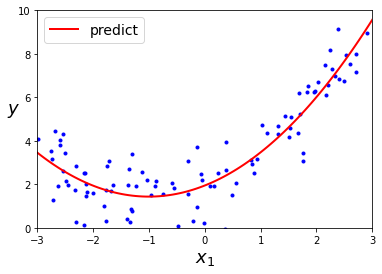

In [13]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="predict")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

##4.4 학습 곡선

모델이 데이터에 과대적합/과소적합 되었는지 알 수 있는 방법?
1. 교차 검증
2. **학습 곡선**

    훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(또는 훈련 반복)의 함수로 나타냄. 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 생성할 수 있음. 

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train set')
    plt.plot(np.sqrt(test_errors), 'b-', linewidth=3, label='test set')
    plt.ylim(0.0, 3.0)
    plt.legend()
    plt.show()

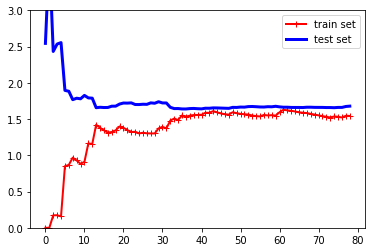

In [24]:
lg = LinearRegression()
plot_learning_curves(lg, X, y)

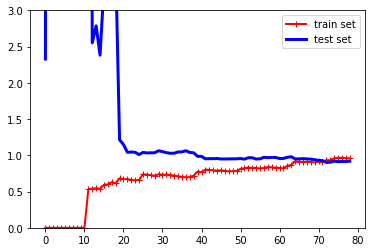

In [25]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                                  ('lg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

* 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
* 두 곡선 사이에 공간이 있음 = 과대적합 모델의 특징 

**과대적합 모델을 개선하는 방법: 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가**

**편향/분산 트레이드 오프**

    모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현할 수 있다

* 편향

    일반화 오차 중 편향은 잘못된 가정에 의해 발생. 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉬움

* 분산

    분산은 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감해 발생. 자유도가 높은 모델(ex. 고차 다항 회귀 모델)은 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향 있음

* 줄일 수 없는 오차

    줄일 수 없는 오차irreducible error는 데이터 자체에 있는 잡음 때문에 발생. 데이터에서 잡음을 제거하여 오차를 줄일 수 있음.


모델의 복잡도가 커지면 일반적으로 분산은 늘어나고 편향은 줄어듦. 반대로 복잡도가 줄어들면 편향이 커지고 분산은 작아짐.

##4.5 규제가 있는 선형 모델

과대적합을 감소시키는 방법 -> 규제!

다항 회귀 모델을 규제하는 방법: 다항식의 차수를 감소

###4.5.1 릿지 회귀

: 규제가 추가된 선형 회귀 버전. 규제항이 비용 함수에 추가됨으로써 학습 알고리즘을 데이터에 맞출 뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 유지. 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가.

*일반적으로 훈련에 사용되는 비용함수는 최적화를 위해 미분 가능해야 함. 반면 테스트에 사용되는 성능 지표는 최종 목표에 가능한 한 가까워야 함. 로그 손실과 같은 비용 함수를 사용해 훈련시킨 분류기를 정밀도/재현율을 사용해 평가하는 것이 좋은 예*

하이퍼파라미터 α는 모델을 얼마나 규제할지 조절. α=0이면 릿지 회귀는 선형 회귀와 같아짐.

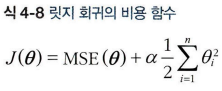

편향 θ0는 규제되지 않음. 릿지 회귀는 입력 특성의 스케일에 민감해 수행 전 데이터의 스케일을 맞추는 것(ex. StandaradScaler)이 중요함.

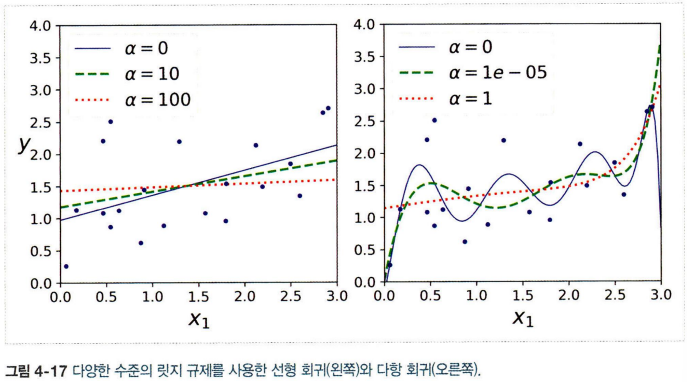

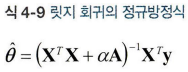

In [27]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1, solver='cholesky')
ridge.fit(X, y)
ridge.predict([[1.5]])

array([[4.94055516]])

In [31]:
sgd = SGDRegressor(penalty='l2')        #penalty: 사용할 규제 지정. 
sgd.fit(X, y.ravel())
sgd.predict([[1.5]])

array([4.91885334])

###4.5.2 라쏘 회귀

릿지 회귀는 l2 규제를 사용하는 대신 라쏘는 l1을 사용

* 덜 중요한 특성의 가중치를 제거함


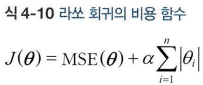

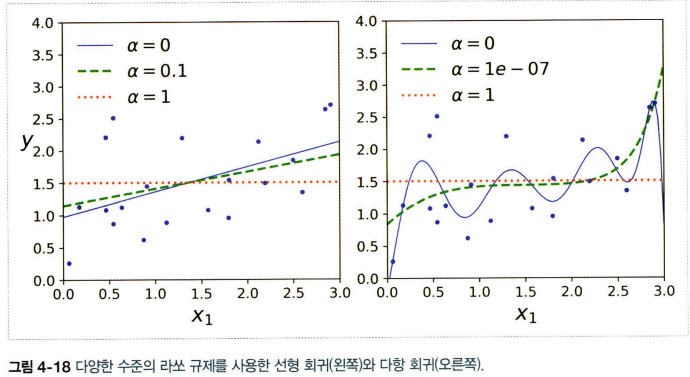


* 라쏘의 비용함수는 θ=0에서 미분 불가능. -> subgradient vector g를 사용하면 경사 하강법을 적용할 수 있음

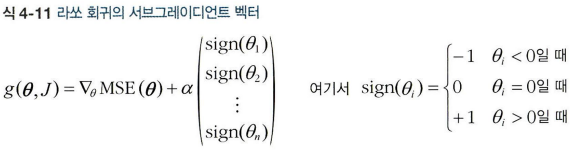

In [32]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)        #==SGDRegressor(penalty='l1')
lasso.fit(X, y)
lasso.predict([[1.5]])

array([4.89176002])

###4.5.3 엘라스틱넷

: 릿지와 라쏘를 절충한 모델. 혼합 비율 r=0이면 릿지 회귀, r=1이면 라쏘 회귀와 같음

* 릿지가 기본이나, 필요한 특성이 몇 개뿐이면 라쏘나 엘라스틱넷을 사용
* 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때 라쏘보다는 엘라스틱넷을 선호

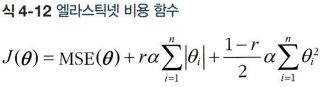

In [33]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X, y)
elastic.predict([[1.5]])

array([4.89451015])

###4.5.4 조기 종료

: 검증 에러가 최솟값에 도달하면 바로 훈련을 중지
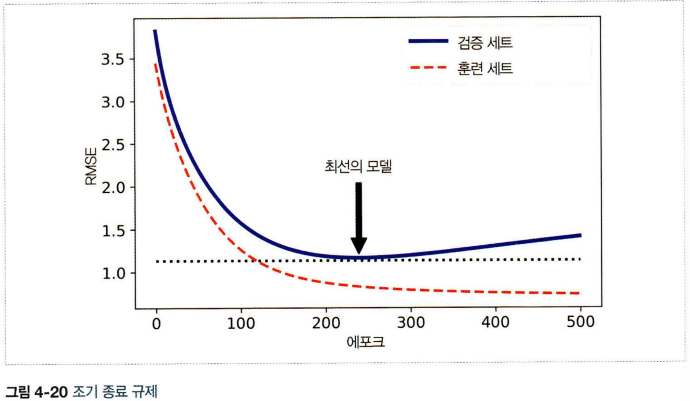

In [35]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

#데이터 준비
poly_scaler = Pipeline([
                        ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
                         ('std_scaler', StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_test_poly_scaled = poly_scaler.transform(X_test)

sgd = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

min_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd.fit(X_train_poly_scaled, y_train)
    y_test_predict = sgd.predict(X_test_poly_scaled)
    val_error = mean_squared_error(y_test, y_test_predict)
    if val_error < min_val_error:
        mim_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

##4.6 로지스틱 회귀logistic regression

: 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용. 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측(레이블이 '1'인 양성 클래스positive class), 아니면 negative class 

**->이진 분류기**

###4.6.1 확률 추정

로지스틱은 0과 1 사이의 값을 출력하는 시그모이드 함수sigmoid function

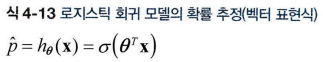

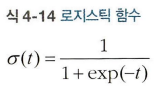

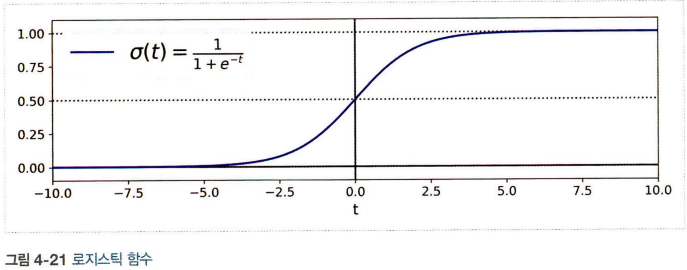

로지스틱 회귀 모델이 샘플 x가 양성 클래스에 속할 확률 p_hat = h(x)를 추정하면 y_hat을 구할 수 있음

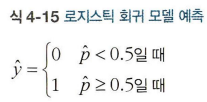

로지스틱 회귀 모델은 θTx가 양수일 때 1(양성)이라 예측, 음수일 때 0이라고 예측

###4.6.2 훈련과 비용 함수

훈련 목적: 양성 샘플에 대해 높은 확률 추정, 음성 샘플에 대해 낮은 확률을 추정하는 모델의 파라미터 벡터θ를 찾는 것

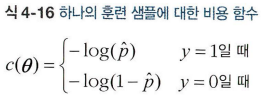

t가 0에 가까워질 수록 -log(t)가 매우 커지므로 타당함. -> 모델이 양성 샘플을 0에 가까운 확률로 추정/음성 샘플을 1에 가까운 확률로 추정하면 비용이 크게 증가

**전체 훈련 세트에 대한 비용함수는 모든 훈련 샘플의 비용의 평균, 즉 로그 손실log loss**

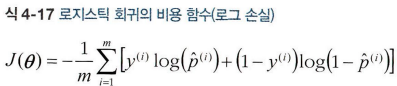

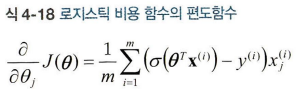

###4.6.3 결정 경계

In [36]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

* sepal length: 꽃받침 길이
* sepal width: 꽃받침 너비
* petal length: 꽃잎 길이
* petal width: 꽃잎 너비

In [44]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [45]:
import pandas as pd

In [46]:
iris_df = pd.DataFrame(iris['data'], columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Petal width를 이용한 Verginca 종 분류기 구현**

In [38]:
X = iris['data'][:, 3:]     # 꽃잎의 너비
y = (iris['target']==2).astype(int)      # 1 Iris-Virginica면 1, 아니면 0

In [39]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X, y)

LogisticRegression()

/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


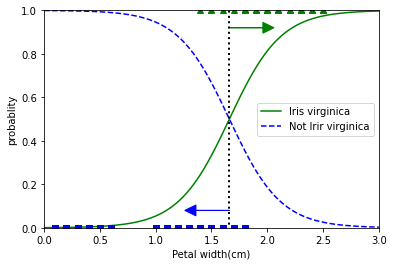

In [48]:
#꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률 계산

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = lg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Irir virginica')
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.legend()
plt.xlabel('Petal width(cm)')
plt.ylabel('probablity')
plt.xlim(0.0, 3.0)
plt.ylim(0.0, 1.0)
plt.show()

* Iris-Verginica(삼각형)의 petal width는 1.4~2.5cm에 분포 
* 다른 붓꽃(사각형)은 0.1~1.8cm에 분포

양쪽의 확률이 각각 50%가 되는 1.6cm 근처에서 결정 경계decision boundary가 만들어짐. 

In [49]:
lg.predict([[1.7], [1.5]])

array([1, 0])

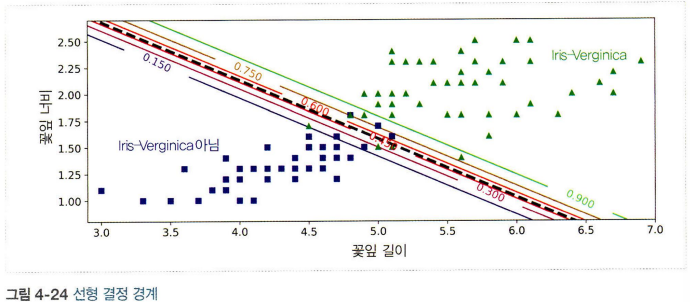

* 로지스틱 회귀 모델도 l1, l2 패널티로 규제할 수 있음
* 사이킷런은 l2 패널티를 기본으로 함
* 사이킷런의 LogisiticRegression 모델의 규제 하이퍼파라미터는 alpha가 아니라 C임. C가 높을수록 모델의 규제가 줄어듦.

###4.6.4 소프트맥스 회귀/다항 로지스틱 회귀

: 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화

* 샘플 x가 주어지면 먼저 소프트 맥스 회귀 모델이 각 클래스 k에 대한 점수 s_k(x)를 계산하고, 그 점수에 소프트맥스 함수를 적용해 각 클래스의 확률을 추정

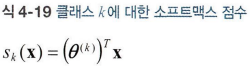

* 각 클래스는 자신만의 파라미터 벡터 θ^(k)가 있음. 이 벡터들은 파라미터 행렬에 행으로 저장됨
* 샘플 x에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스에 속할 확률 p_hat_k를 추정할 수 있음 
* 이 함수는 각 점수에 지수 함수를 적용한 후 정규화 함
* 일반적으로 이 점수를 로짓 또는 로그-오즈라고 부름

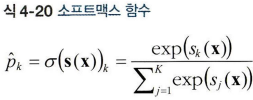

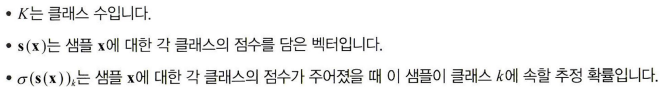

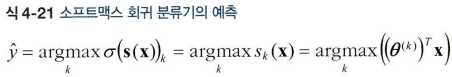

**소프트맥스 회귀 분류기는 한 번에 하나의 클래스만 예측. 상호 배타적인 클래스에서만 사용해야 함**

모델 훈련: 크로스 엔트로피cross entropy 비용 함수를 최소화

* 크로스 엔트로피: 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도

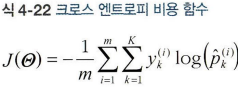

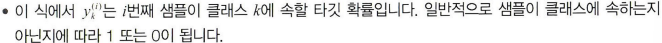

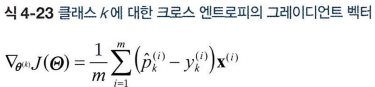

* 사이킷런의 Logistic Regression은 클래스가 둘 이상일 때 기본적으로 일대다(OvA) 전략을 사용
* multi_class 매개변수를 'multinomial'로 바꾸면 소프트맥스 회귀를 사용할 수 있음

In [51]:
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [53]:
softmax.predict([[5, 2]])       #꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃을 발견했을 때 예측 -> class 2는 Iris-Virginica

array([2])

In [54]:
softmax.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

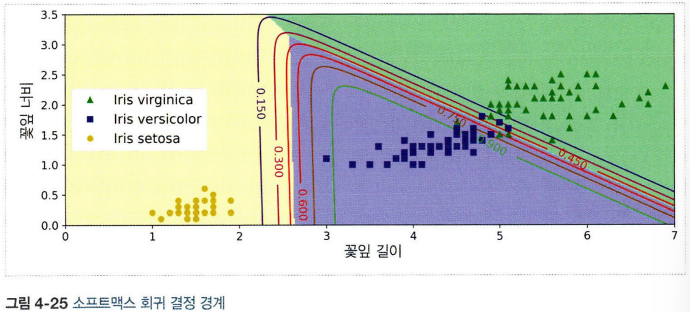